# Ejercicios con NumPy, Pandas y Matplotlib (y Seaborn)

Este notebook contiene una serie de 10 ejercicios diseñados para practicar el uso de **NumPy**, **Pandas** y **Matplotlib** (con la opción de utilizar **Seaborn** en algunas visualizaciones).

Cada ejercicio incluye una descripción del problema, y en celdas aparte podrás implementar las soluciones.



## Ejercicio 1: Serie Temporal de Temperaturas Simuladas

1. **Objetivo**: Crear y analizar una serie temporal de temperaturas diarias.
2. **Enunciado**:
   - Usa `numpy.random.normal(loc=20, scale=5, size=365)` para generar 365 datos aleatorios que simulen temperaturas diarias para un año, con una media de 20°C y una desviación estándar de 5°C.
   - Usa `pd.date_range('2023-01-01', periods=365)` para crear una columna de fechas.
   - Crea un DataFrame con Pandas que contenga las fechas y las temperaturas.
   - Calcula la media, el valor mínimo y máximo mensual.
   - Representa la serie temporal de las temperaturas usando `matplotlib` o `seaborn`.


In [129]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

           Temperatura
media        20.174206
valor_min     6.485556
valor_max    33.411316


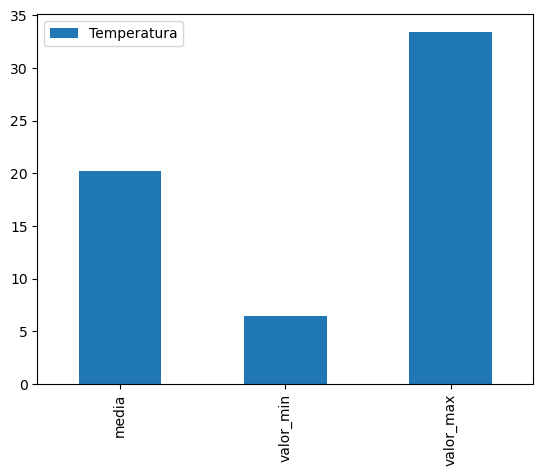

In [49]:
temperaturas = np.random.normal(loc=20, scale=5, size=365)
fechas = pd.date_range('2023-01-01', periods=365)

datos = pd.DataFrame(temperaturas, index=fechas, columns=["Temperatura"])
datos = datos.agg(
    media = ("Temperatura", "mean"),
    valor_min = ("Temperatura","min"),
    valor_max = ("Temperatura", "max")
)
print(datos)

datos.plot.bar(stacked=False);


## Ejercicio 2: Análisis del Dataset "Iris"

1. **Objetivo**: Cargar y explorar el dataset de Iris.
2. **Enunciado**:
   - Carga el dataset de Iris desde `https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data`.
   - Usa `pandas` para asignar nombres de columnas: ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species'].
   - Calcula la media y la desviación estándar de cada especie para las columnas numéricas.
   - Visualiza la distribución de cada característica numérica con un gráfico de histogramas y boxplots usando `seaborn` o `matplotlib`.


In [99]:
columns=["sepal_length", "sepal_width", "petal_length", "petal_width","species"]
datos= pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data", delimiter=',', names=columns)

data = datos.groupby("species").agg(
    media_sepal_length=("sepal_length", "mean"),
    std_sepal_length=("sepal_length", "std"),
    media_sepal_width=("sepal_width", "mean"),
    std_sepal_width=("sepal_width", "std"),
    media_petal_length=("petal_length", "mean"),
    std_petal_length=("petal_length", "std"),
    media_petal_width=("petal_width", "mean"),
    std_petal_width=("petal_width", "std")
)

data.head()


,media_sepal_length,std_sepal_length,media_sepal_width,std_sepal_width,media_petal_length,std_petal_length,media_petal_width,std_petal_width
species,,,,,,,,
Iris-setosa,5.006,0.352490,3.418,0.381024,1.464,0.173511,0.244,0.107210
Iris-versicolor,5.936,0.516171,2.770,0.313798,4.260,0.469911,1.326,0.197753
Iris-virginica,6.588,0.635880,2.974,0.322497,5.552,0.551895,2.026,0.274650



## Ejercicio 3: Análisis Exploratorio del Dataset "Titanic"

1. **Objetivo**: Realizar un análisis exploratorio básico.
2. **Enunciado**:
   - Carga el dataset de Titanic desde `https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv`.
   - Usa `pandas` para explorar el dataset y calcular estadísticas descriptivas (media, mediana, etc.).
   - Encuentra la proporción de sobrevivientes vs no sobrevivientes y visualízala con un gráfico de barras.
   - Crea un gráfico de correlación entre las características numéricas usando `seaborn.heatmap`.


In [115]:
titanic = pd.read_csv("https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv")
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


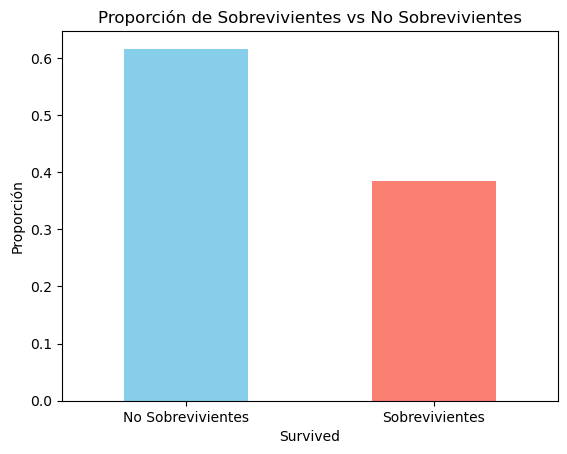

In [137]:
proporcion_sobrevivientes = titanic['Survived'].value_counts(normalize=True)

proporcion_sobrevivientes.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Proporción de Sobrevivientes vs No Sobrevivientes')
plt.xticks(ticks=[0, 1], labels=['No Sobrevivientes', 'Sobrevivientes'], rotation=0)
plt.ylabel('Proporción')
plt.show()


## Ejercicio 4: Análisis de Ventas Mensuales de una Tienda

1. **Objetivo**: Simular y analizar ventas mensuales.
2. **Enunciado**:
   - Usa `numpy.random.normal(loc=100, scale=20, size=12)` para simular ventas mensuales de una tienda para un año (12 meses) con una media de 100 ventas y una desviación estándar de 20.
   - Crea un DataFrame con las fechas correspondientes y los valores de ventas.
   - Calcula la media y la desviación estándar de las ventas.
   - Representa la serie de tiempo de las ventas usando `matplotlib`.


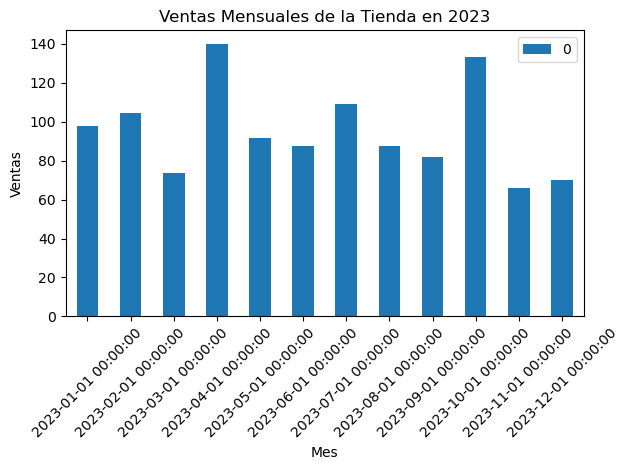

In [185]:
ventas = np.random.normal(loc=100, scale=20, size=12)
fechas = pd.date_range(start='2023-01-01',end='2023-12-31',freq='MS')
df = pd.DataFrame(ventas, index=fechas)
df.describe()
df.plot(kind="bar")
mpl.title('Ventas Mensuales de la Tienda en 2023')
mpl.xlabel('Mes')
mpl.ylabel('Ventas')
mpl.xticks(rotation=45)  # Rotar etiquetas para mejorar la legibilidad
mpl.tight_layout()  # Ajusta automáticamente el gráfico para evitar que las etiquetas se solapen
mpl.show()


## Ejercicio 5: Comparación de Modelos de Clasificación en el Dataset "Wine"

1. **Objetivo**: Comparar diferentes modelos de clasificación visualmente.
2. **Enunciado**:
   - Carga el dataset de vino desde `https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data`.
   - Usa `pandas` para explorar los datos y preparar las columnas de características y etiquetas.
   - Usa `numpy` para dividir el dataset en conjuntos de entrenamiento y prueba.
   - Representa la precisión de diferentes modelos de clasificación (Regresión Logística, K-Vecinos) usando gráficos de barras con `matplotlib`.


In [189]:
vino = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data", delimiter=',')
vino

,1,14.23,1.71,2.43,15.6,127,2.8,3.06,.28,2.29,5.64,1.04,3.92,1065
0,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
2,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
3,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
4,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
173,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
174,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
175,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840



## Ejercicio 6: Visualización de la Distribución de Propiedades de Viviendas (Dataset "Boston")

1. **Objetivo**: Analizar la distribución de precios y características de viviendas.
2. **Enunciado**:
   - Carga el dataset de precios de vivienda de Boston desde `https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data`.
   - Asigna nombres a las columnas según la descripción del dataset.
   - Usa `pandas` para explorar la distribución de los precios de las viviendas.
   - Visualiza la correlación entre el número de habitaciones y el precio con un gráfico de dispersión usando `matplotlib`.



## Ejercicio 7: Distribución Geográfica de Datos de Uber

1. **Objetivo**: Visualizar datos geográficos con coordenadas.
2. **Enunciado**:
   - Carga los datos de Uber desde `https://raw.githubusercontent.com/fivethirtyeight/uber-tlc-foil-response/master/uber-trip-data/uber-raw-data-apr14.csv`.
   - Usa `pandas` para explorar el dataset, enfocándote en las columnas de latitud y longitud.
   - Usa `seaborn` para visualizar la densidad de puntos geográficos en un gráfico de calor sobre un mapa de Nueva York.



## Ejercicio 8: Análisis de Datos Meteorológicos

1. **Objetivo**: Analizar un dataset de datos meteorológicos históricos.
2. **Enunciado**:
   - Carga los datos meteorológicos históricos desde `https://raw.githubusercontent.com/jbrownlee/Datasets/master/daily-min-temperatures.csv`.
   - Usa `pandas` para calcular estadísticas mensuales (media, máximo, mínimo) de las temperaturas.
   - Visualiza la serie temporal de temperaturas mínimas usando `matplotlib` y resalta los valores máximos y mínimos anuales.
